In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import fiona

In [2]:
fiona.supported_drivers['KML'] = 'rw'

In [3]:
gdf = gpd.read_file('./FootpathGrades.geojson')

In [4]:
gdf

,grade1in,gradepc,segside,statusid,asset_type,deltaz,streetid,mccid_int,mcc_id,address,rlmax,rlmin,distance,geometry
0,6.5,15.44,,1,Road Footway,7.08,117856,22770,1390653,Hopetoun Bridge from Dynon Road,8.43,1.35,45.85,"MULTIPOLYGON (((144.91014 -37.80104, 144.91015..."
1,6.5,15.44,,None,Road Footway,7.08,None,None,1390653,,8.43,1.35,45.85,"MULTIPOLYGON (((144.91014 -37.80104, 144.91014..."
2,18.7,5.35,,8,Road Footway,7.56,3098,30055,1390162,Maribyrnong River,8.55,0.99,141.37,"MULTIPOLYGON (((144.91051 -37.80106, 144.91051..."
3,18.7,5.35,,1,Road Footway,7.56,117856,22770,1390162,Hopetoun Bridge from Dynon Road,8.55,0.99,141.37,"MULTIPOLYGON (((144.91051 -37.80106, 144.91053..."
4,1.8,56.74,,1,Road Footway,6.58,117856,22770,1386023,Hopetoun Bridge from Dynon Road,8.18,1.6,11.6,"MULTIPOLYGON (((144.91051 -37.80106, 144.91052..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33267,None,None,,None,Road Footway,None,None,None,1389611,,None,None,None,"MULTIPOLYGON (((144.93858 -37.77739, 144.93857..."
33268,None,None,,3,Road Footway,None,119267,22934,1389611,Manchester Lane between Cade Way and Kirrip Cr...,None,None,None,"MULTIPOLYGON (((144.93858 -37.77739, 144.93858..."
33269,27.8,3.6,,None,Road Footway,0.4,None,None,1530894,,22.24,21.84,11.11,"MULTIPOLYGON (((144.94267 -37.77606, 144.94270..."
33270,None,0.0,,None,Road Footway,0.0,None,None,1389616,,22.68,22.68,0.0,"MULTIPOLYGON (((144.94267 -37.77606, 144.94267..."


<AxesSubplot:>

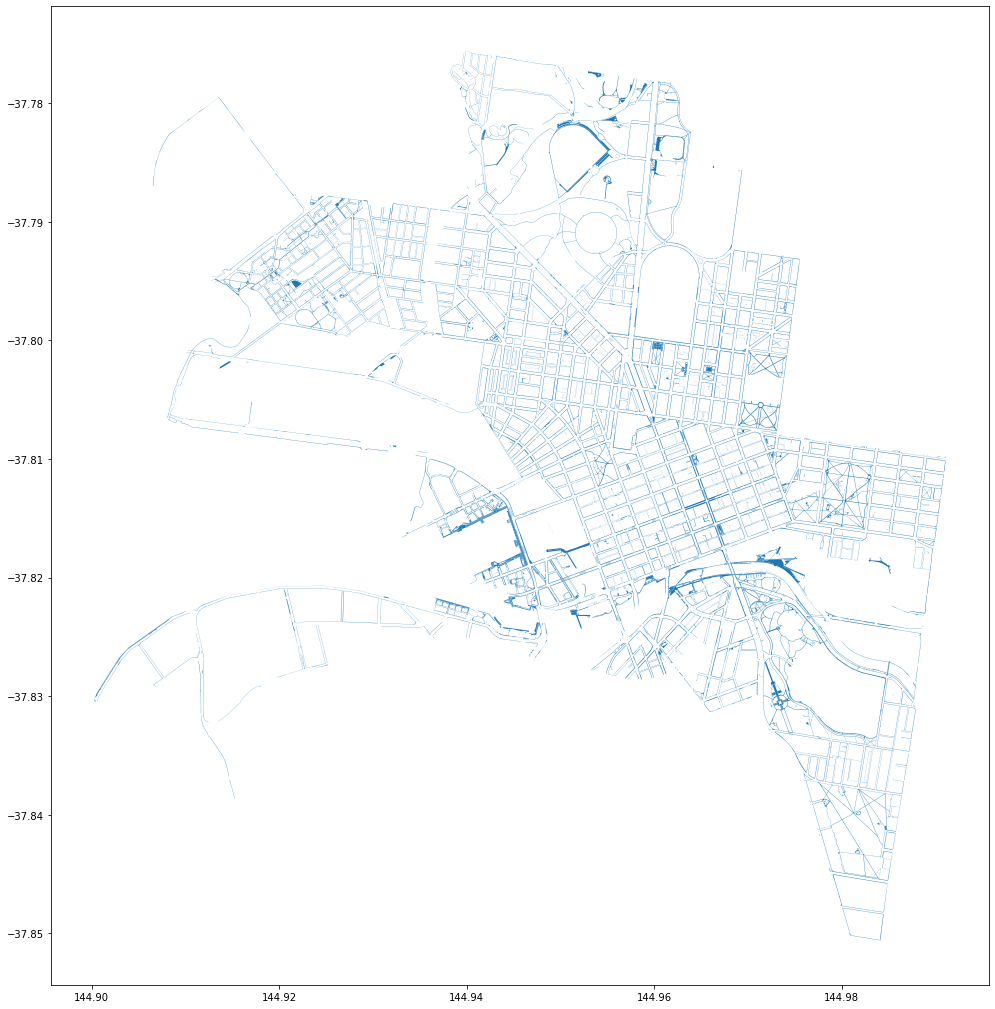

In [5]:
gdf.plot(figsize=(18, 18), alpha = 1)

In [6]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33272 entries, 0 to 33271
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   grade1in    26009 non-null  object  
 1   gradepc     28839 non-null  object  
 2   segside     33272 non-null  object  
 3   statusid    20353 non-null  object  
 4   asset_type  33272 non-null  object  
 5   deltaz      28839 non-null  object  
 6   streetid    20353 non-null  object  
 7   mccid_int   20353 non-null  object  
 8   mcc_id      33272 non-null  object  
 9   address     33272 non-null  object  
 10  rlmax       28839 non-null  object  
 11  rlmin       28839 non-null  object  
 12  distance    28839 non-null  object  
 13  geometry    33272 non-null  geometry
dtypes: geometry(1), object(13)
memory usage: 3.6+ MB


In [7]:
gdf = gdf[['address', 'geometry', 'gradepc', 'grade1in']]

In [8]:
gdf = gdf.drop(gdf.index[gdf['gradepc'].isnull()], inplace=False)
gdf = gdf.drop(gdf.index[gdf['grade1in'].isnull()], inplace=False)

In [9]:
(gdf['gradepc'])

0        15.44
1        15.44
2         5.35
3         5.35
4        56.74
         ...  
33262     0.28
33263     6.57
33264     0.64
33269      3.6
33271     1.51
Name: gradepc, Length: 26009, dtype: object

In [10]:
green = gdf[gdf.gradepc.astype('float') <= 4].assign(color='green')
yellow = gdf[(gdf.gradepc.astype('float') > 4) & (gdf.grade1in.astype('float') <= 20)].assign(color='yellow')
red = gdf[gdf.gradepc.astype('float') > 20].assign(color='red')

In [11]:
mel = green.append(yellow)
mel = mel.append(red)

In [12]:
mel

,address,geometry,gradepc,grade1in,color
5,Footscray Road between Dock Link Road and Sims...,"MULTIPOLYGON (((144.90809 -37.80639, 144.90811...",0.0,37241.4,green
7,,"MULTIPOLYGON (((144.90801 -37.80651, 144.90802...",0.0,37241.4,green
20,Footscray Road between Dock Link Road and Sims...,"MULTIPOLYGON (((144.90824 -37.80644, 144.90825...",1.35,74.0,green
21,Shepherd Bridge from Footscray Road,"MULTIPOLYGON (((144.90824 -37.80644, 144.90824...",1.35,74.0,green
22,Hopetoun Bridge from Dynon Road,"MULTIPOLYGON (((144.91066 -37.80088, 144.91067...",3.05,32.7,green
...,...,...,...,...,...
32455,Sims Street between Dynon Road and Footscray Road,"MULTIPOLYGON (((144.90886 -37.80467, 144.90886...",34.79,2.9,red
32469,Sims Street between Dynon Road and Footscray Road,"MULTIPOLYGON (((144.90926 -37.80330, 144.90926...",33.97,2.9,red
32614,,"MULTIPOLYGON (((144.94046 -37.79911, 144.94063...",46.87,2.1,red
32639,,"MULTIPOLYGON (((144.94064 -37.79852, 144.94057...",32.92,3.0,red


<AxesSubplot:>

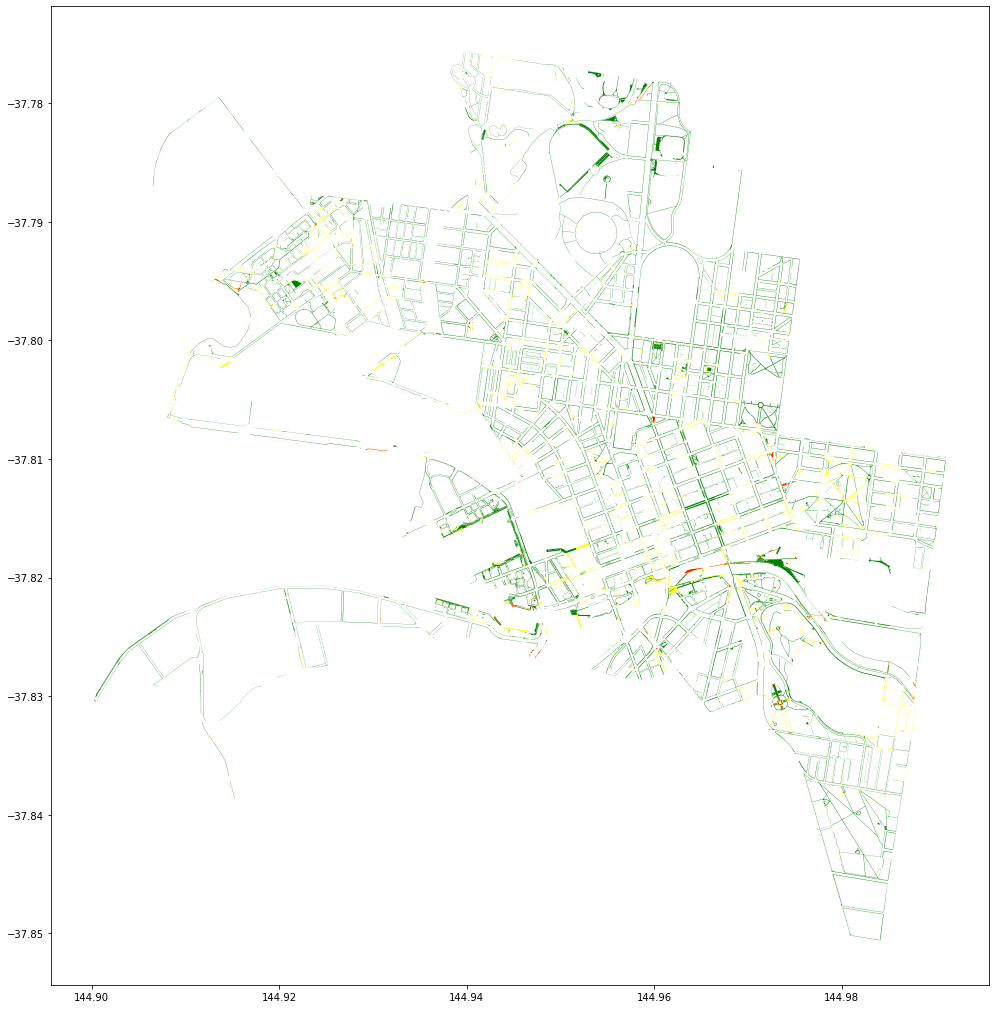

In [13]:
mel.plot(figsize=(18, 18), alpha = 1, color=mel['color']) 

In [14]:
mel.to_file("mel_footpath.geojson", driver='GeoJSON')

In [15]:
mel.insert(0,'name', "")
mel.insert(1,'description', "")

In [16]:
mel['name'] = mel['address']
mel['name'].replace('', np.nan, inplace=True)
mel.loc[pd.isna(mel['name']), 'name'] = 'Footpath address unknown.'

mel['description'] = 'The percentage grade of this footpath is ' + mel['gradepc'] + '.'

In [17]:
mel

,name,description,address,geometry,gradepc,grade1in,color
5,Footscray Road between Dock Link Road and Sims...,The percentage grade of this footpath is 0.0.,Footscray Road between Dock Link Road and Sims...,"MULTIPOLYGON (((144.90809 -37.80639, 144.90811...",0.0,37241.4,green
7,Footpath address unknown.,The percentage grade of this footpath is 0.0.,,"MULTIPOLYGON (((144.90801 -37.80651, 144.90802...",0.0,37241.4,green
20,Footscray Road between Dock Link Road and Sims...,The percentage grade of this footpath is 1.35.,Footscray Road between Dock Link Road and Sims...,"MULTIPOLYGON (((144.90824 -37.80644, 144.90825...",1.35,74.0,green
21,Shepherd Bridge from Footscray Road,The percentage grade of this footpath is 1.35.,Shepherd Bridge from Footscray Road,"MULTIPOLYGON (((144.90824 -37.80644, 144.90824...",1.35,74.0,green
22,Hopetoun Bridge from Dynon Road,The percentage grade of this footpath is 3.05.,Hopetoun Bridge from Dynon Road,"MULTIPOLYGON (((144.91066 -37.80088, 144.91067...",3.05,32.7,green
...,...,...,...,...,...,...,...
32455,Sims Street between Dynon Road and Footscray Road,The percentage grade of this footpath is 34.79.,Sims Street between Dynon Road and Footscray Road,"MULTIPOLYGON (((144.90886 -37.80467, 144.90886...",34.79,2.9,red
32469,Sims Street between Dynon Road and Footscray Road,The percentage grade of this footpath is 33.97.,Sims Street between Dynon Road and Footscray Road,"MULTIPOLYGON (((144.90926 -37.80330, 144.90926...",33.97,2.9,red
32614,Footpath address unknown.,The percentage grade of this footpath is 46.87.,,"MULTIPOLYGON (((144.94046 -37.79911, 144.94063...",46.87,2.1,red
32639,Footpath address unknown.,The percentage grade of this footpath is 32.92.,,"MULTIPOLYGON (((144.94064 -37.79852, 144.94057...",32.92,3.0,red


In [18]:
mel.drop('address', inplace=True, axis=1)
mel.drop('gradepc', inplace=True, axis=1)
mel.drop('grade1in', inplace=True, axis=1)

In [19]:
mel

,name,description,geometry,color
5,Footscray Road between Dock Link Road and Sims...,The percentage grade of this footpath is 0.0.,"MULTIPOLYGON (((144.90809 -37.80639, 144.90811...",green
7,Footpath address unknown.,The percentage grade of this footpath is 0.0.,"MULTIPOLYGON (((144.90801 -37.80651, 144.90802...",green
20,Footscray Road between Dock Link Road and Sims...,The percentage grade of this footpath is 1.35.,"MULTIPOLYGON (((144.90824 -37.80644, 144.90825...",green
21,Shepherd Bridge from Footscray Road,The percentage grade of this footpath is 1.35.,"MULTIPOLYGON (((144.90824 -37.80644, 144.90824...",green
22,Hopetoun Bridge from Dynon Road,The percentage grade of this footpath is 3.05.,"MULTIPOLYGON (((144.91066 -37.80088, 144.91067...",green
...,...,...,...,...
32455,Sims Street between Dynon Road and Footscray Road,The percentage grade of this footpath is 34.79.,"MULTIPOLYGON (((144.90886 -37.80467, 144.90886...",red
32469,Sims Street between Dynon Road and Footscray Road,The percentage grade of this footpath is 33.97.,"MULTIPOLYGON (((144.90926 -37.80330, 144.90926...",red
32614,Footpath address unknown.,The percentage grade of this footpath is 46.87.,"MULTIPOLYGON (((144.94046 -37.79911, 144.94063...",red
32639,Footpath address unknown.,The percentage grade of this footpath is 32.92.,"MULTIPOLYGON (((144.94064 -37.79852, 144.94057...",red


In [20]:
mel_green = mel[mel.color == 'green']
mel_yellow = mel[mel.color == 'yellow']
mel_red = mel[mel.color == 'red']

In [21]:
mel_green.drop('color', inplace=True, axis=1)
mel_yellow.drop('color', inplace=True, axis=1)
mel_red.drop('color', inplace=True, axis=1)

C:\Users\thier\anaconda3\envs\AG\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [29]:
mel_red

,name,description,geometry
4,Hopetoun Bridge from Dynon Road,The percentage grade of this footpath is 56.74.,"MULTIPOLYGON (((144.91051 -37.80106, 144.91052..."
6,Shepherd Bridge from Footscray Road,The percentage grade of this footpath is 25.53.,"MULTIPOLYGON (((144.90809 -37.80639, 144.90809..."
10,Hopetoun Bridge from Dynon Road,The percentage grade of this footpath is 56.74.,"MULTIPOLYGON (((144.91052 -37.80105, 144.91052..."
15,Footscray Road between Dock Link Road and Sims...,The percentage grade of this footpath is 35.34.,"MULTIPOLYGON (((144.90825 -37.80644, 144.90826..."
16,Shepherd Bridge from Footscray Road,The percentage grade of this footpath is 35.34.,"MULTIPOLYGON (((144.90825 -37.80644, 144.90825..."
...,...,...,...
32455,Sims Street between Dynon Road and Footscray Road,The percentage grade of this footpath is 34.79.,"MULTIPOLYGON (((144.90886 -37.80467, 144.90886..."
32469,Sims Street between Dynon Road and Footscray Road,The percentage grade of this footpath is 33.97.,"MULTIPOLYGON (((144.90926 -37.80330, 144.90926..."
32614,Footpath address unknown.,The percentage grade of this footpath is 46.87.,"MULTIPOLYGON (((144.94046 -37.79911, 144.94063..."
32639,Footpath address unknown.,The percentage grade of this footpath is 32.92.,"MULTIPOLYGON (((144.94064 -37.79852, 144.94057..."


In [30]:
mel_yellow

,name,description,geometry
0,Hopetoun Bridge from Dynon Road,The percentage grade of this footpath is 15.44.,"MULTIPOLYGON (((144.91014 -37.80104, 144.91015..."
1,Footpath address unknown.,The percentage grade of this footpath is 15.44.,"MULTIPOLYGON (((144.91014 -37.80104, 144.91014..."
2,Maribyrnong River,The percentage grade of this footpath is 5.35.,"MULTIPOLYGON (((144.91051 -37.80106, 144.91051..."
3,Hopetoun Bridge from Dynon Road,The percentage grade of this footpath is 5.35.,"MULTIPOLYGON (((144.91051 -37.80106, 144.91053..."
4,Hopetoun Bridge from Dynon Road,The percentage grade of this footpath is 56.74.,"MULTIPOLYGON (((144.91051 -37.80106, 144.91052..."
...,...,...,...
33032,Auckland Lane from Cade Way,The percentage grade of this footpath is 5.56.,"MULTIPOLYGON (((144.93925 -37.77804, 144.93925..."
33043,Manchester Lane between Cade Way and Kirrip Cr...,The percentage grade of this footpath is 5.56.,"MULTIPOLYGON (((144.93924 -37.77803, 144.93924..."
33257,Footpath address unknown.,The percentage grade of this footpath is 5.14.,"MULTIPOLYGON (((144.95049 -37.77834, 144.95048..."
33261,Footpath address unknown.,The percentage grade of this footpath is 6.57.,"MULTIPOLYGON (((144.94951 -37.77770, 144.94953..."


In [31]:
mel_green

,name,description,geometry
5,Footscray Road between Dock Link Road and Sims...,The percentage grade of this footpath is 0.0.,"MULTIPOLYGON (((144.90809 -37.80639, 144.90811..."
7,Footpath address unknown.,The percentage grade of this footpath is 0.0.,"MULTIPOLYGON (((144.90801 -37.80651, 144.90802..."
20,Footscray Road between Dock Link Road and Sims...,The percentage grade of this footpath is 1.35.,"MULTIPOLYGON (((144.90824 -37.80644, 144.90825..."
21,Shepherd Bridge from Footscray Road,The percentage grade of this footpath is 1.35.,"MULTIPOLYGON (((144.90824 -37.80644, 144.90824..."
22,Hopetoun Bridge from Dynon Road,The percentage grade of this footpath is 3.05.,"MULTIPOLYGON (((144.91066 -37.80088, 144.91067..."
...,...,...,...
33258,Footpath address unknown.,The percentage grade of this footpath is 1.06.,"MULTIPOLYGON (((144.95091 -37.77787, 144.95090..."
33262,Footpath address unknown.,The percentage grade of this footpath is 0.28.,"MULTIPOLYGON (((144.94951 -37.77770, 144.94950..."
33264,Footpath address unknown.,The percentage grade of this footpath is 0.64.,"MULTIPOLYGON (((144.94958 -37.77773, 144.94957..."
33269,Footpath address unknown.,The percentage grade of this footpath is 3.6.,"MULTIPOLYGON (((144.94267 -37.77606, 144.94270..."


In [25]:
mel_green1 = mel_green.iloc[1: 2000]
mel_green2 = mel_green.iloc[2000: 4000]
mel_green3 = mel_green.iloc[4000: 6000]
mel_green4 = mel_green.iloc[6000: 8000]
mel_green5 = mel_green.iloc[8000: 10000]
mel_green6 = mel_green.iloc[10000: 12000]
mel_green7 = mel_green.iloc[12000: 14000]
mel_green8 = mel_green.iloc[14000: 16000]
mel_green9 = mel_green.iloc[16000: 18000]
mel_green10 = mel_green.iloc[18000: ]

In [26]:
mel_yellow1 = mel_yellow.iloc[1: 2000]
mel_yellow2 = mel_yellow.iloc[2000: 3000]
mel_yellow3 = mel_yellow.iloc[3000: ]

In [27]:
mel_green1.to_file('mel_green1.kml', driver='KML')
mel_green2.to_file('mel_green2.kml', driver='KML')
mel_green3.to_file('mel_green3.kml', driver='KML')
mel_green4.to_file('mel_green4.kml', driver='KML')
mel_green5.to_file('mel_green5.kml', driver='KML')
mel_green6.to_file('mel_green6.kml', driver='KML')
mel_green7.to_file('mel_green7.kml', driver='KML')
mel_green8.to_file('mel_green8.kml', driver='KML')
mel_green9.to_file('mel_green9.kml', driver='KML')
mel_green10.to_file('mel_green10.kml', driver='KML')


mel_yellow1.to_file('mel_yellow1.kml', driver='KML')
mel_yellow2.to_file('mel_yellow2.kml', driver='KML')
mel_yellow3.to_file('mel_yellow3.kml', driver='KML')

mel_red.to_file('mel_red.kml', driver='KML')

In [28]:
mel_green

,name,description,geometry
5,Footscray Road between Dock Link Road and Sims...,The percentage grade of this footpath is 0.0.,"MULTIPOLYGON (((144.90809 -37.80639, 144.90811..."
7,Footpath address unknown.,The percentage grade of this footpath is 0.0.,"MULTIPOLYGON (((144.90801 -37.80651, 144.90802..."
20,Footscray Road between Dock Link Road and Sims...,The percentage grade of this footpath is 1.35.,"MULTIPOLYGON (((144.90824 -37.80644, 144.90825..."
21,Shepherd Bridge from Footscray Road,The percentage grade of this footpath is 1.35.,"MULTIPOLYGON (((144.90824 -37.80644, 144.90824..."
22,Hopetoun Bridge from Dynon Road,The percentage grade of this footpath is 3.05.,"MULTIPOLYGON (((144.91066 -37.80088, 144.91067..."
...,...,...,...
33258,Footpath address unknown.,The percentage grade of this footpath is 1.06.,"MULTIPOLYGON (((144.95091 -37.77787, 144.95090..."
33262,Footpath address unknown.,The percentage grade of this footpath is 0.28.,"MULTIPOLYGON (((144.94951 -37.77770, 144.94950..."
33264,Footpath address unknown.,The percentage grade of this footpath is 0.64.,"MULTIPOLYGON (((144.94958 -37.77773, 144.94957..."
33269,Footpath address unknown.,The percentage grade of this footpath is 3.6.,"MULTIPOLYGON (((144.94267 -37.77606, 144.94270..."
